create scatter plots for each patient, with initial weekly dose on the x-axis and TSH levels on the y-axis. The first TSH level can be marked with one color, and the second TSH level can be marked with a different color.

This visualization will help to identify any trends or patterns between the initial weekly dose, the new dose, and the TSH levels. For example, if the new dose was higher than the initial weekly dose, the scatter plot should show an increase in TSH levels. Conversely, if the new dose was lower than the initial weekly dose, the scatter plot should show a decrease in TSH levels.

Additionally, statistical analysis could be performed on the data to identify any significant correlations between the initial weekly dose, the new dose, and the TSH levels. Regression analysis could be used to determine the relationship between the initial weekly dose and TSH levels, as well as the relationship between the new dose and TSH levels. This would allow healthcare professionals to better understand how medication dosage affects thyroid function and adjust dosages accordingly.

one approach could be to use a multiple regression analysis that includes both weight and initial weekly dose as independent variables and initial TSH level as the dependent variable. This would allow for the examination of the unique effects of each variable on the outcome variable and help identify whether weight has an impact on the relationship between initial weekly dose and initial TSH level.

It is also possible that other factors, such as age or gender, may impact this relationship, and including these variables in the analysis could provide a more comprehensive understanding of the factors that influence thyroid function and medication dosage requirements.

This code loads the data into a pandas dataframe, defines the independent and dependent variables, adds a constant term to the independent variables, fits the regression model using Ordinary Least Squares (OLS), and prints a summary of the results.

The output of model.summary() will include information such as the coefficients for each independent variable, the intercept, the R-squared value, and the p-values for each coefficient, which can help determine the significance of each variable in predicting the dependent variable.





In [44]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, max_error, r2_score, mean_squared_error

In [27]:
fname = "ForAnalysis.xlsx"

!pip install openpyxl

In [28]:
df = pd.read_excel(fname, header=1)
df["TSH2_const"] = 2.0
df.head(2)

,weight,Initial weekly dose,TSH1,New Dose,TSH2,TSH2_const
0,70.0,475,4.0,525,1.66,2.0
1,115.0,350,13.1,525,1.80,2.0


In [29]:
df.describe()

,weight,Initial weekly dose,TSH1,New Dose,TSH2,TSH2_const
count,57.000000,57.000000,57.00000,57.000000,56.000000,57.0
mean,79.070175,635.087719,3.54300,713.070175,1.450964,2.0
std,21.085379,253.011313,2.09441,243.497130,0.876003,0.0
min,48.500000,175.000000,0.13000,275.000000,0.100000,2.0
25%,64.000000,475.000000,2.37000,550.000000,0.847500,2.0
50%,74.000000,625.000000,3.44000,650.000000,1.435000,2.0
75%,87.000000,750.000000,4.00000,825.000000,1.845000,2.0
max,140.000000,1300.000000,13.10000,1350.000000,3.920000,2.0


In [30]:
df["Initial weekly dose"].min()

175

In [31]:
df["dose_perc_change"] = (df["New Dose"] - df["Initial weekly dose"])/df["Initial weekly dose"] *100.
df["perc_change_tsh"] = np.abs((df["TSH2"] - df["TSH1"])/df["TSH1"] *100.)

df["log_dose_perc_change"] = np.log(df["dose_perc_change"])
df["log_perc_change_tsh"] = np.log(df["perc_change_tsh"])
df.dropna(how="any", inplace=True)
df

/Users/nicolegoebel/.pyenv/versions/3.9.5/envs/ds-performance/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,weight,Initial weekly dose,TSH1,New Dose,TSH2,TSH2_const,dose_perc_change,perc_change_tsh,log_dose_perc_change,log_perc_change_tsh
0,70.0,475,4.000,525,1.660,2.0,10.526316,58.500000,2.353878,4.069027
1,115.0,350,13.100,525,1.800,2.0,50.000000,86.259542,3.912023,4.457361
2,115.0,525,1.800,575,1.620,2.0,9.523810,10.000000,2.253795,2.302585
3,107.0,700,5.500,800,1.670,2.0,14.285714,69.636364,2.659260,4.243287
4,75.0,700,3.110,750,0.950,2.0,7.142857,69.453376,1.966113,4.240656
5,55.0,350,1.180,445,0.780,2.0,27.142857,33.898305,3.301114,3.523365
6,80.0,700,3.670,775,0.970,2.0,10.714286,73.569482,2.371578,4.298230
7,73.0,600,3.820,650,1.350,2.0,8.333333,64.659686,2.120264,4.169138
8,73.0,650,1.350,700,1.240,2.0,7.692308,8.148148,2.040221,2.097791
9,110.0,1300,2.710,1350,1.830,2.0,3.846154,32.472325,1.347074,3.480388


In [32]:
df.describe()

,weight,Initial weekly dose,TSH1,New Dose,TSH2,TSH2_const,dose_perc_change,perc_change_tsh,log_dose_perc_change,log_perc_change_tsh
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.0,55.000000,55.000000,55.000000,55.000000
mean,79.254545,640.000000,3.648564,720.363636,1.470436,2.0,17.258653,55.091188,2.505024,3.864175
std,21.435492,254.660268,2.053267,243.872793,0.871760,0.0,18.465921,25.593996,0.767575,0.601253
min,48.500000,175.000000,1.180000,275.000000,0.100000,2.0,2.564103,8.148148,0.941609,2.097791
25%,63.500000,500.000000,2.545000,562.500000,0.885000,2.0,8.012821,33.185315,2.080242,3.501877
50%,74.000000,625.000000,3.490000,650.000000,1.470000,2.0,10.526316,49.404762,2.353878,3.900047
75%,89.000000,750.000000,4.005000,850.000000,1.850000,2.0,16.985646,77.537745,2.829883,4.350765
max,140.000000,1300.000000,13.100000,1350.000000,3.920000,2.0,100.000000,96.969697,4.605170,4.574399


# Data Exploration

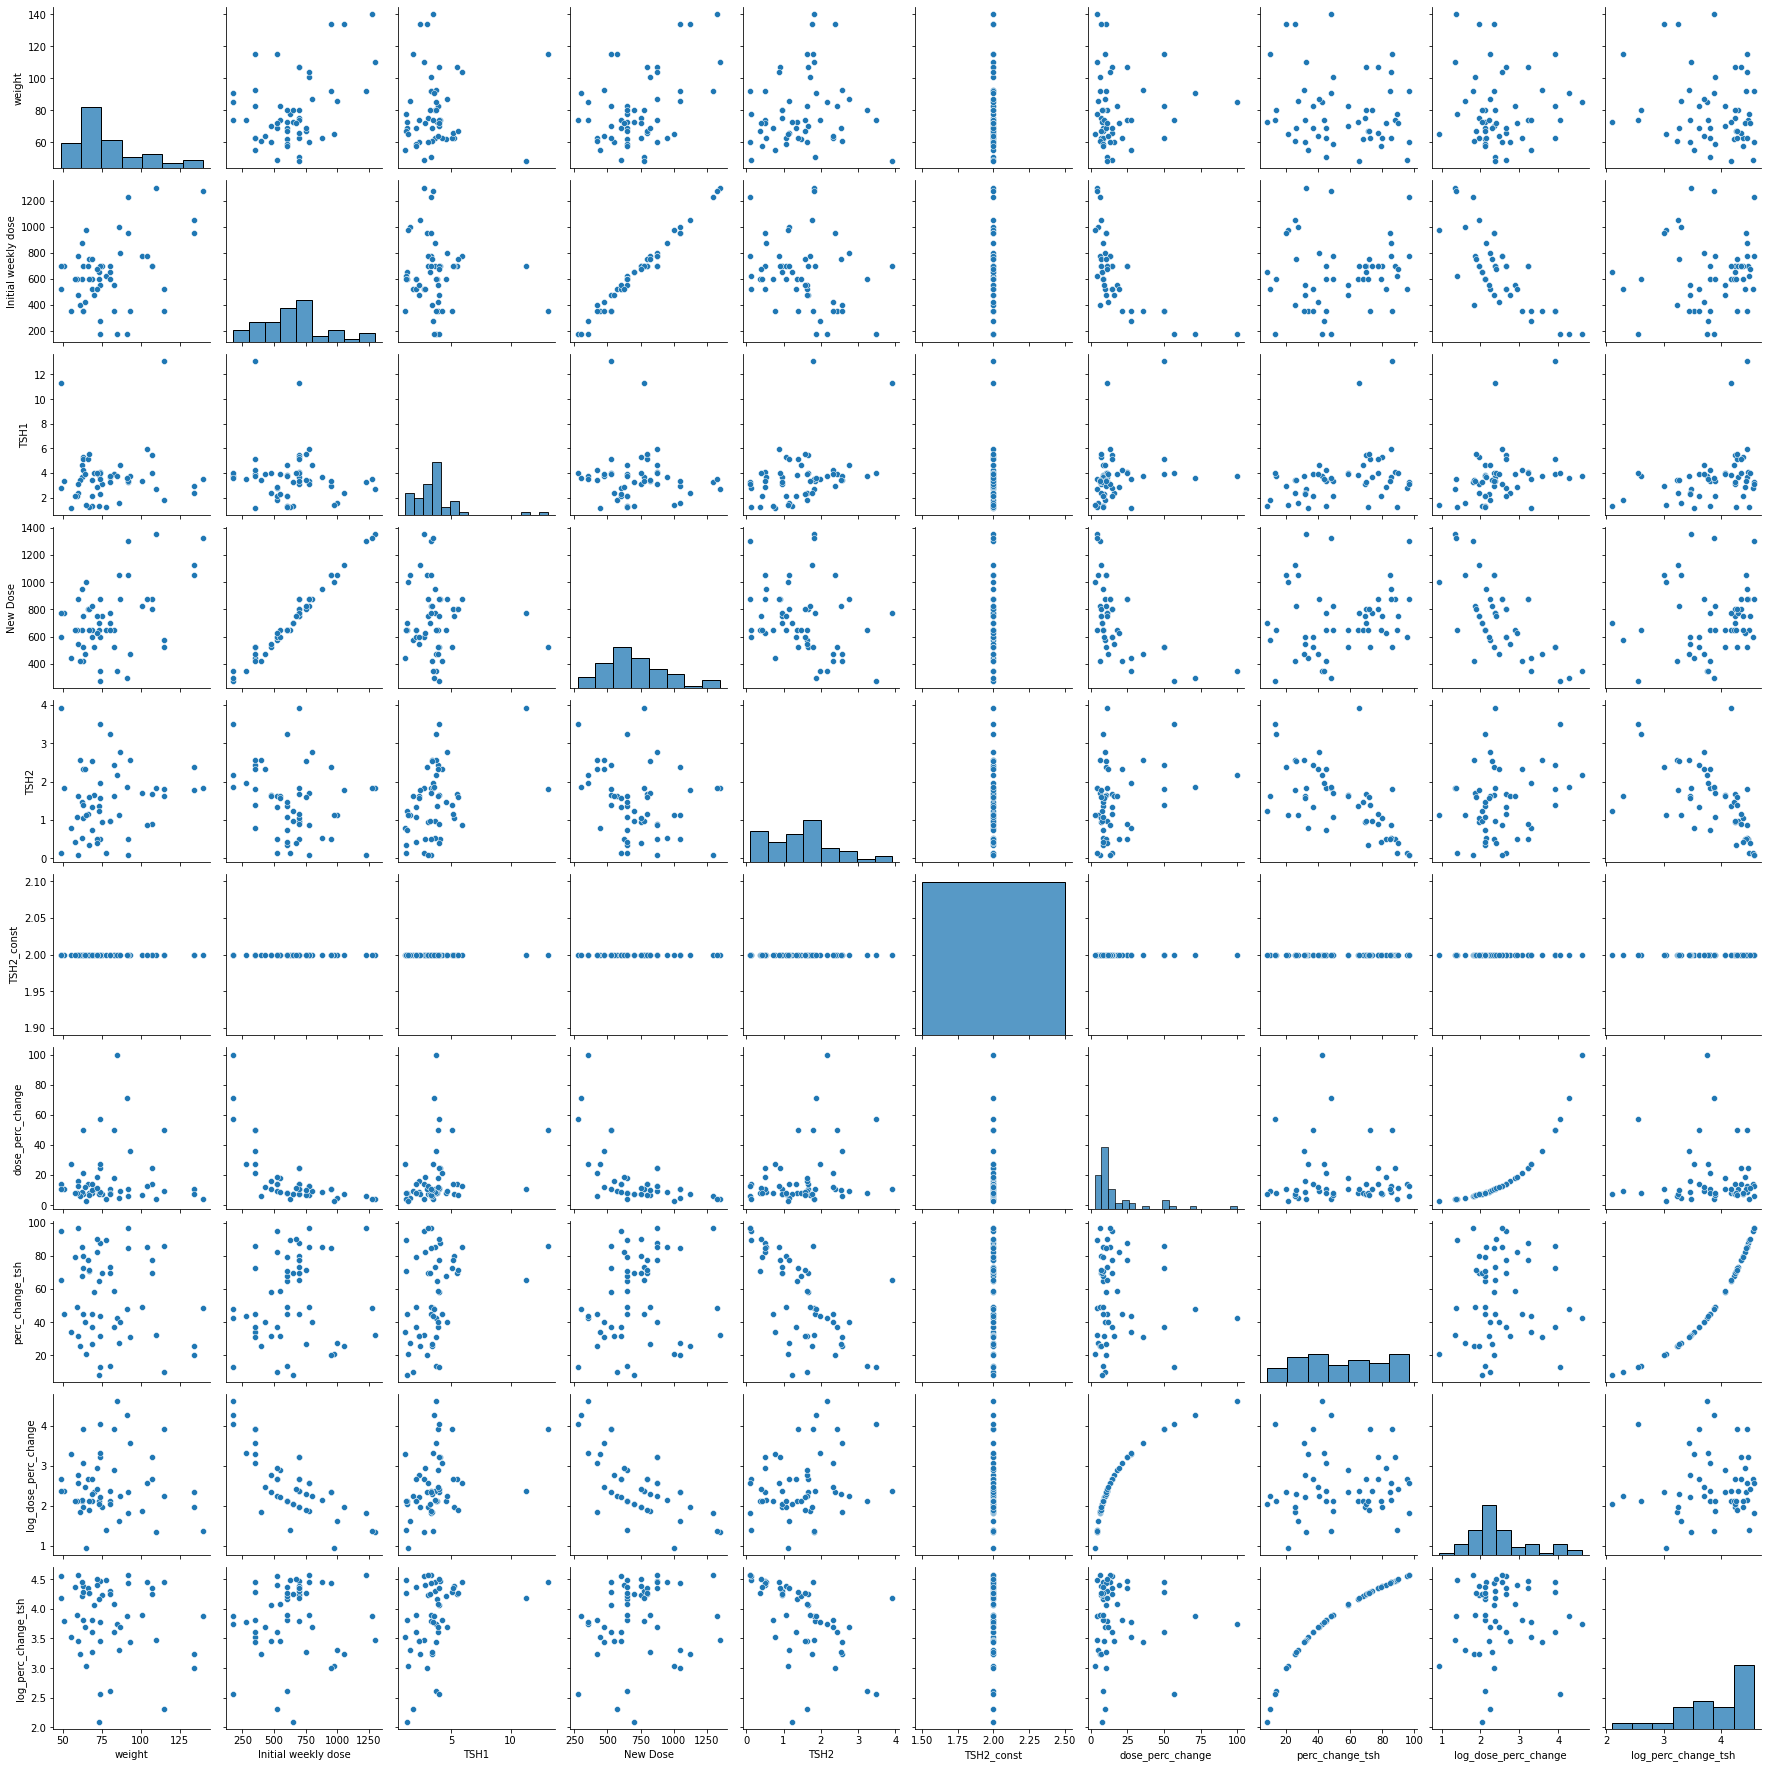

In [33]:
sns.pairplot(data=df)#[df["perc_change_tsh"]<0])

# Regression Model: predicting TSH 2

In [34]:
train=df.sample(frac=0.8,random_state=200)
test=df.drop(train.index)
#replace TSH2 with the value 2.0 for all cases
# train["TSH2_const"]=2.0
# test["TS2_const"] = 2.0
train.shape, test.shape

((44, 10), (11, 10))

In [35]:
train.head()

,weight,Initial weekly dose,TSH1,New Dose,TSH2,TSH2_const,dose_perc_change,perc_change_tsh,log_dose_perc_change,log_perc_change_tsh
45,74.0,275,3.49,350,1.97,2.0,27.272727,43.553009,3.305887,3.773979
46,67.0,750,5.58,800,1.59,2.0,6.666667,71.505376,1.897120,4.269773
40,93.0,350,3.73,475,2.57,2.0,35.714286,31.099196,3.575551,3.437182
39,48.5,700,11.30,775,3.92,2.0,10.714286,65.309735,2.371578,4.179141
56,64.0,425,3.90,475,2.33,2.0,11.764706,40.256410,2.465104,3.695269


In [36]:
test.head()

,weight,Initial weekly dose,TSH1,New Dose,TSH2,TSH2_const,dose_perc_change,perc_change_tsh,log_dose_perc_change,log_perc_change_tsh
4,75.0,700,3.11,750,0.95,2.0,7.142857,69.453376,1.966113,4.240656
12,51.0,700,3.33,775,1.84,2.0,10.714286,44.744745,2.371578,3.800974
14,74.0,700,4.07,875,0.50,2.0,25.000000,87.714988,3.218876,4.474093
15,63.0,700,5.26,750,1.06,2.0,7.142857,79.847909,1.966113,4.380124
16,60.0,475,2.37,550,1.62,2.0,15.789474,31.645570,2.759343,3.454598


## Model 1

In [37]:
def sklearn_regr(df, input_cols, output_col):
    y = df[output_col].values
    X = df[input_cols].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    print(f"r^2: {linreg.score(X_test, y_test): .2f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred): .2f}")
    print(f"Coefficients: {linreg.coef_}")
    print(f"Intercept: {linreg.intercept_}")
    return linreg, linreg.coef_, X_train, X_test, y_train, y_test

In [38]:
input_cols = ['weight', 'Initial weekly dose', "TSH1", "TSH2_const"]
output_col = 'New Dose'
model, coeffs1, X_train, X_test, y_train, y_test = sklearn_regr(df, input_cols, output_col)

r^2:  0.99
MSE:  1075.71
Coefficients: [0.72448334 0.93687149 6.43726343 0.        ]
Intercept: 39.43075567759104


In [39]:
X_test

array([[6.100e+01, 4.000e+02, 3.430e+00, 2.000e+00],
       [5.500e+01, 3.500e+02, 1.180e+00, 2.000e+00],
       [4.900e+01, 5.250e+02, 2.770e+00, 2.000e+00],
       [8.600e+01, 1.000e+03, 1.570e+00, 2.000e+00],
       [8.300e+01, 3.500e+02, 3.880e+00, 2.000e+00],
       [6.900e+01, 7.500e+02, 3.440e+00, 2.000e+00],
       [6.500e+01, 9.750e+02, 1.430e+00, 2.000e+00],
       [1.400e+02, 1.275e+03, 3.540e+00, 2.000e+00],
       [7.400e+01, 2.750e+02, 3.490e+00, 2.000e+00],
       [5.100e+01, 7.000e+02, 3.330e+00, 2.000e+00],
       [5.800e+01, 6.000e+02, 2.090e+00, 2.000e+00]])

In [40]:
weight = 61
initdose=400
tsh1 = 3.430
tsh2=2.560
inputs = [[weight, initdose, tsh1, tsh2]]
model.predict(inputs)[0]

480.4526472142003

In [41]:
ypred_train = model.predict(X_train)
ypred_train

array([ 808.16546183,  860.30817945,  623.12754578,  709.97481073,
        445.80826955,  776.82421955,  769.59693533, 1135.54727003,
        440.20785037, 1045.72247954,  601.86165949,  292.42102534,
        774.74325162, 1354.50183816,  543.17002605,  727.14824937,
        660.10455783,  803.11931432,  928.16264369,  676.1473985 ,
        560.90759885,  828.930674  ,  657.81641727,  594.86026189,
        658.14061007,  534.97951072,  798.57393931,  626.19094389,
       1017.54722144,  879.02539649,  881.82689701,  683.58767944,
        826.54468356, 1274.99376205,  776.2729753 ,  689.46734132,
        509.07339819,  640.20500788,  679.03127714,  282.8084592 ,
        775.05222488,  289.10408745,  749.67292725,  458.72371886])

In [42]:
ypred_test = model.predict(X_test)
ypred_test

array([ 480.45264721,  414.77833017,  584.61918895, 1048.71431203,
        452.44447497,  814.21790649, 1009.17715787, 1358.15747989,
        373.14823076,  753.62553311,  657.02756129])

Text(0.5, 0, 'Actual')

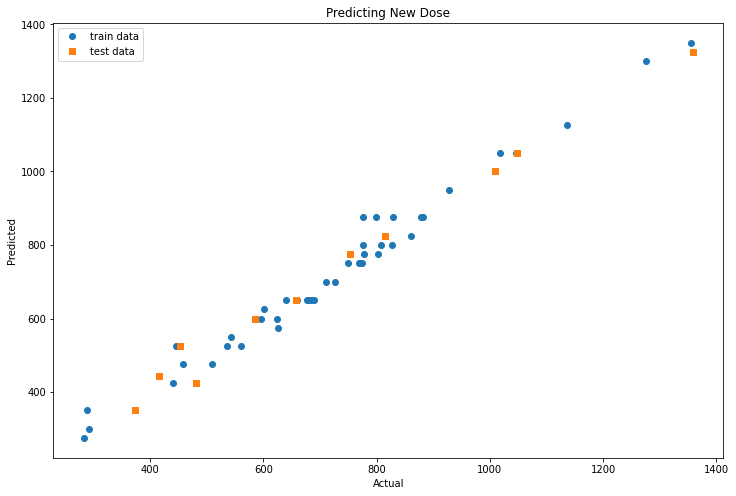

In [47]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(ypred_train, y_train, 'o', label="train data")
ax.plot(ypred_test, y_test, 's', label="test data")
ax.set_title("Predicting New Dose")
ax.legend()
plt.ylabel("Predicted")
plt.xlabel('Actual')

In [227]:
#!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 20.1 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.6/813.6 kB 15.5 MB/s eta 0:00:00m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 20.6 MB/s eta 0:00:000:00:010:00:01:01
  Using cached semver-2.13.0-py2.py3-none-any.whl (12 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.8 MB/s eta 0:00:0031m25.2 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.1/342.1 kB 10.0 MB/s eta 0:00:00


  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19567 sha256=4b8f3714539d32cecc7a4e5a5de4be8a75fe86fe55917779c1f036c5f01a1e6f
  Stored in directory: /Users/nicolegoebel/Library/Caches/pip/wheels/2d/f0/a8/1094fca7a7e5d0d12ff56e0c64675d72aa5cc81a5fc200e849
Successfully built validators
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.11.2
    Uninstalling Pygments-2.11.2:
      Successfully uninstalled Pygments-2.11.2

[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python3.9 -m pip install --upgrade pip


In [48]:
# Define the independent variables
input_cols = ['weight', 'Initial weekly dose', "TSH1", "TSH2_const"]
output_col = 'New Dose'
X = train[input_cols]

# Define the dependent variable
y = train[output_col]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               New Dose   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     637.4
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           8.65e-34
Time:                        19:25:18   Log-Likelihood:                -214.84
No. Observations:                  44   AIC:                             437.7
Df Residuals:                      40   BIC:                             444.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
weight                  0.8419    

## Model 2

In [138]:
input_cols = ['weight', 'perc_change_tsh'] #'dose_perc_change']
output_col = 'dose_perc_change'
sklearn_regr(df, input_cols, output_col)


-0.0968601181142843
205.94198344184414
Coefficients: [ 0.05249857 -0.06844734]


In [139]:
input_cols = ['weight', 'dose_perc_change'] #'dose_perc_change']
output_col = 'perc_change_tsh'
sklearn_regr(df, input_cols, output_col)


-0.5569617279521026
780.8894032708952
Coefficients: [-0.28542012 -0.11253518]


In [140]:
# Define the independent variables
X = train[input_cols]

# Define the dependent variable
y = train[output_col]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model2 = sm.OLS(y, X).fit()

# Print the results
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:        perc_change_tsh   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.033
Method:                 Least Squares   F-statistic:                    0.3030
Date:                Tue, 21 Mar 2023   Prob (F-statistic):              0.740
Time:                        17:19:57   Log-Likelihood:                -234.26
No. Observations:                  45   AIC:                             474.5
Df Residuals:                      42   BIC:                             479.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -60.0888     29.595  